<a id='section_id'></a>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("/datasets/real_estate_data.csv", sep="	")
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Для удобства работы удалим столбцы, которые нам не понадобятся при решении поставленных задач.

In [3]:
df.drop(["total_images", "open_plan", "is_apartment", "airports_nearest", "studio",
         "parks_around3000", "parks_nearest", "ponds_around3000", "ponds_nearest"], axis = 1, inplace=True)

In [4]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 13 columns):
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
cityCenters_nearest     18180 non-null float64
days_exposition         20518 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 6.2 MB


Оценим общий массив данных.
Обновленная таблица имеет 23699 строк и 13 столбцов. Преобразовывать названия столбцов нет необходимости.Видим пропущенные значения в большинстве столбцов c данными типа float.
Для части столбцов после заполнения пропусков необходимо произвести преобразорвание типа данных из float в int. Теперь проанализируем основные характеристики нашей выборки.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0
cityCenters_nearest,18180.0,1.419128e+04,8.608386e+03,181.0,9238.00,13098.50,16293.0,65968.0


Видим аномальные максимальные и минимальные значения в каждом столбце:
 - для части квартир количество комнат в квартире равно 0 (таких строк 197, что менее 1%, поэтому можно их удалить в процессе отсечения выбросов);
 - в столбце ceiling_height имеется как минимум одна квартира с высотой потолков 1 м (ее мы также отсечем при удалении выбросов); 
 - квартира, а может дом, общей площадью 900 кв.м с кухней 112 кв.м и жилой площадью 409,7 кв.м;
 - квартира с площадью кухни 1,3 кв.м и жилой площадью 2 кв.м
 - квартира, в которой 19 комнат;
 - квартира с высотой потолков 100 м;
 - квартира, которую продавали в небоскребе в 60 этажей;
 - квартира/дом, в которой имеется 5 балконов.

### Вывод

В процессе первичного анализа данных были выявлены следующие проблемы, мешающие обработке данных:
- в большинстве столбцов имеются пропущенные данные: часть из них можно заменить (balcony, ceiling_height, kitchen_area, living_area), часть безболезненно удалить, поскольку доля пропусков мала (floors_total, locality_name), а часть придется оставить как есть, т.к. доля пропусков значительна (cityCenters_nearest, days_exposition);
- также практически во всех столбцах были обнаружены аномальные максимальные и минимальные значения, которые мы сможем удалить в дальнейшем при отсечении выбросов.
- для отдельных столбцов (last_price, floors_total, balcony) требуется произвести замену типа данных на int.

## Предобработка данных

Мы обнаружили, что в столбцах last_price, floors_total, balcony, days_exposition данные имеют дробный тип float.
При этом по факту они принимают целочисленные значения. Однако предварительно в этих столбцах необходимо заполнить пропуски. Там, где заполнить пропуски будет невозможно, придется оставить тип данных float. Сначала определим долю пропусков для каждого столбца.

In [6]:
df.isna().mean().sort_values(ascending = False)

balcony                 0.486054
ceiling_height          0.387991
cityCenters_nearest     0.232879
days_exposition         0.134225
kitchen_area            0.096122
living_area             0.080299
floors_total            0.003629
locality_name           0.002068
floor                   0.000000
rooms                   0.000000
first_day_exposition    0.000000
total_area              0.000000
last_price              0.000000
dtype: float64

Часть данных могла быть пропущена, поскольку в объявлении нет жестких требований указывать, например, высоту потолков,площадь кухни или жилую площадь, общее количество этажей в доме.
Отсутствие информации по длительности экспозиции может быть объяснено тем фактом, что на момент выгрузки квартира еще находилась в продаже и сделка была не закрыта.
Наличие пропусков в столбце cityCenters_nearest может быть обяснено тем, что продавец не указал точный адрес дома,поэтому система не смогла вычислить расстояние до центра города.

Для отдельных столбцов мы можем произвести замену пропущенных значений (ниже список в порядке убывания общей доли пропусков):
 - для balcony пропуски можно заменить на 0, поскольку отсутствие данных говорит, скорее всего, говорит об отсутствии самого балкона;
 - для ceiling_height мы можем заменить пропуски на медианное значение, т.к. высота потолков принимает довольно узкий диапазон значений от 2,5 до 3,5;
 **- для cityCenters_nearest заполнить пропуски проблематично*;
 **- для days_exposition мы также никак не можем заполнить пропущенные данные*;
 - для kitchen_area также заполним медианным значением в зависимости от количества комнат в квартире;
 - для living_area заполним пропуски медианными значениями в зависимости от количества комнат в квартире;
 - для floors_total заполнить значения не предоставляется возможным, а поскольку доля таких строк менее 1% мы можем безболезненно удалить такие строки;
 - для locality_name заполнить пропуски не представляется возможным, но таких пропусков менее 1%, так что их тоже можно удалить.

In [7]:
#удалим строки с пропусками в столбцах locality_name и floors_total
df = df.dropna(subset=["locality_name", "floors_total"])
#для столбца balcony заменим пропуски на 0
df["balcony"] = df["balcony"].fillna(0)
#заменим пропуски в столбцах ceiling_height на медианное значение
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

Заполним пропуски в столбцах kitchen_area и living_area медианным значением в зависимости от количества комнат от 1 до 5.

In [8]:
def fillna_kitchen_area(row):
    kitchen_area = row['kitchen_area']
    rooms = row['rooms']
    if rooms == 1:
        return df[df['rooms'] == 1]['kitchen_area'].median()
    if rooms == 2:
        return df[df['rooms'] == 2]['kitchen_area'].median()
    if rooms == 3:
        return df[df['rooms'] == 3]['kitchen_area'].median()
    if rooms == 4:
        return df[df['rooms'] == 4]['kitchen_area'].median()
    if rooms == 5:
        return df[df['rooms'] == 5]['kitchen_area'].median()
    
df.loc[df.kitchen_area.isna(), "kitchen_area"] = df[df.kitchen_area.isna()].apply(fillna_kitchen_area, axis=1)

In [9]:
def fillna_living_area(row):
    living_area = row['living_area']
    rooms = row['rooms']
    if rooms == 1:
        return df[df['rooms'] == 1]['living_area'].median()
    if rooms == 2:
        return df[df['rooms'] == 2]['living_area'].median()
    if rooms == 3:
        return df[df['rooms'] == 3]['living_area'].median()
    if rooms == 4:
        return df[df['rooms'] == 4]['living_area'].median()
    if rooms == 5:
        return df[df['rooms'] == 5]['living_area'].median()
    
df.loc[df.living_area.isna(), "living_area"] = df[df.living_area.isna()].apply(fillna_living_area, axis=1)

In [10]:
def area_check(row):
    if row['living_area'] + row['kitchen_area'] < row['total_area']:
        return 'ok'
    return 'ошибка' 

df['area_check'] = df.apply(area_check, axis=1)
df['area_check'].value_counts()

ok        22991
ошибка      574
Name: area_check, dtype: int64

После заполнения пропусков медианными значениями для столбцов living_area и kitchen_area обнаружилось 574 строк, где сумма площади кухни и жилой площади превышает общую площадь квартиры. Поскольку помимо жилых комнат и площади кухни в общую площадь также входят коридор, санузел, лоджия/балкон (при наличии), можем удалить подобные строки, которые составляют порядка 2,5% от общего массива данных.

In [11]:
df = df.query('area_check != "ошибка"')

In [12]:
#Проверим наличие явных дубликатов
df.duplicated().sum()
#Первичный анализ дубликатов не выявил, но их может быть и больше из-за разных вариантов 
#написания названий в столбце locality_name  

0

In [13]:
#проверим наличие неявных дубликатов с помощью метода value_counts
#df['locality_name'].value_counts().head(50)
#были обнаружены неявные дубликаты в связи с разным написанием слова посёлок/поселок, а также дубликаты
#"поселок Мурино" - "Мурино" и "деревня Кудрово" - "Кудрово"
#предварительно заменим пропуски текстом "unknown", чтобы в дальнейшем можно было произвести замены
df["locality_name"] = df["locality_name"].fillna("unknown")
#заменим слово "посёлок" на "поселок"
df['locality_name'] = df['locality_name'].apply(lambda i: i.replace("посёлок", "поселок"))
#а теперь дубликаты для Мурино и Кудрово
df['locality_name'] = df['locality_name'].apply(lambda i: i.replace("поселок Мурино", "Мурино"))
df['locality_name'] = df['locality_name'].apply(lambda i: i.replace("деревня Кудрово", "Кудрово"))
df.duplicated().sum()
#после замены дубликатов в столбце locality_name новых дубликатов в датафрейме не выявлено

0

Теперь можем изменить тип данных и провести их оптимизацию.

In [14]:
df["first_day_exposition"] = pd.to_datetime(df["first_day_exposition"])
df['last_price'] = df['last_price'].astype("int")
df['floors_total'] = df['floors_total'].astype("int")
df['balcony'] = df['balcony'].astype("int")

In [15]:
#проведем оптимизацию типов данных, для этого сначала выделим столбцы с разными типами данных
df_int = df.select_dtypes(include=['int'])
df_float = df.select_dtypes(include=['float'])
df_obj = df.select_dtypes(include=['object'])

#проведем нисходящее преобразование типов числовых данных, а строковые данные к категориальному типу.
converted_int = df_int.apply(pd.to_numeric,downcast='unsigned')
converted_float = df_float.apply(pd.to_numeric,downcast='float')
converted_obj = df_obj.astype('category')

#создадим копию исходного объекта DataFrame, используя оптимизированные столбцы.

optimized_df = df.copy()
optimized_df[converted_int.columns] = converted_int
optimized_df[converted_float.columns] = converted_float
optimized_df[converted_obj.columns] = converted_obj

In [16]:
#сравним использование памяти до и после оптимизации типов данных
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # исходим из предположения о том, что если это не DataFrame, то это Series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # преобразуем байты в мегабайты
    return "{:03.2f} MB".format(usage_mb)

print(mem_usage(df))
print(mem_usage(optimized_df))

6.60 MB
1.18 MB


Благодаря оптимизации использования памяти нам удалось снизить потребление памяти с 861.6 Мбайт до 104.28 Мбайт, т.е. сэкономить 88% памяти. Сохраним оптимизированный датафрейм как основной.

In [17]:
df = optimized_df
print(mem_usage(df))

1.18 MB


## Расчёты и добавление результатов в таблицу

**Добавим новые столбцы:** 
 -	цена квадратного метра;
 - 	день недели, месяц и год публикации объявления;
 -  этаж квартиры: первый, последний или другой;
 -  соотношение жилой и общей площади, а также отношение площади кухни к общей;
 -  расстояние до центра города в километрах, округленное до целого.

In [18]:
df["price_per_meter"] = df["last_price"] / df["total_area"]
df["weekday"] = df["first_day_exposition"].dt.weekday
df["month_exposition"] = pd.DatetimeIndex(df["first_day_exposition"]).month
df["year_exposition"] = pd.DatetimeIndex(df["first_day_exposition"]).year
df["living_to_total_area"] = df["living_area"] / df["total_area"]
df["kitchen_to_total_area"] = df["kitchen_area"] / df["total_area"]
df['cityCenters_nearest_km'] = (df['cityCenters_nearest'] / 1000).round(0)

pd.set_option('display.float_format', '{:,.2f}'.format)

In [19]:
#теперь разобьем этажи на три группы: первый, последний и другой
def floor_group(row):  
    if row["floor"] == 1:
        return "первый"
    if row["floor"] == row["floors_total"]:
        return "последний"
    return "другой" 

df['floor_group'] = df.apply(floor_group, axis=1)

In [20]:
#чтобы изучить зависимость цены от того, на каком этаже расположена квартира: первом, последнем или
#другом, присвоим каждой группе свой номер
def floor_group_number(row):  
    if row["floor_group"] == 'первый':
        return 1
    if row["floor_group"] == 'последний':
        return 3
    return 2 

df['floor_group_number'] = df.apply(floor_group_number, axis=1)
display(df.head())

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,area_check,price_per_meter,weekday,month_exposition,year_exposition,living_to_total_area,kitchen_to_total_area,cityCenters_nearest_km,floor_group,floor_group_number
0,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,25.00,0,...,ok,"120,370.37",3,3,2019,0.47,0.23,16.00,другой,2
1,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,11.00,2,...,ok,"82,920.79",1,12,2018,0.46,0.27,19.00,первый,1
2,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,8.30,0,...,ok,"92,785.71",3,8,2015,0.61,0.15,14.00,другой,2
3,64900000,159.00,2015-07-24,3,2.65,14,45.00,9,9.50,0,...,ok,"408,176.10",4,7,2015,0.28,0.06,7.00,другой,2
4,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,41.00,0,...,ok,"100,000.00",1,6,2018,0.32,0.41,8.00,другой,2


[В начало](#section_id)

## Исследовательский анализ данных

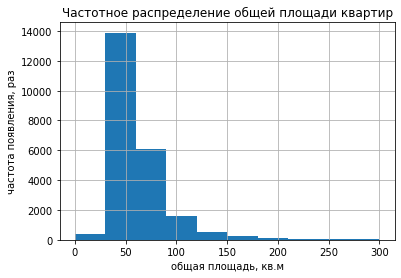

In [21]:
#построим гистограммы для всех столбцов, по которым мы хотим исключить выбросы
df['total_area'].hist(bins=10,range=(0, 300))
plt.xlabel('общая площадь, кв.м')
plt.ylabel('частота появления, раз')
plt.title("Частотное распределение общей площади квартир")
plt.show()
#мы видим, что основная часть данных total_area лежит в диапазоне примерно до 120 кв.м

(0, 125)

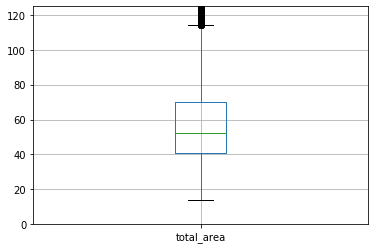

In [22]:
#для более глубокого анализа построим диаграмму размаха
df.boxplot(column='total_area')
plt.ylim(0, 125)
#В размах «усов» попадают нормальные значения, а за пределами находятся выбросы.
#Таким образом, мы можем удалить все строки, где в столбце total_area значения меньше 15 и больше 115 кв.м

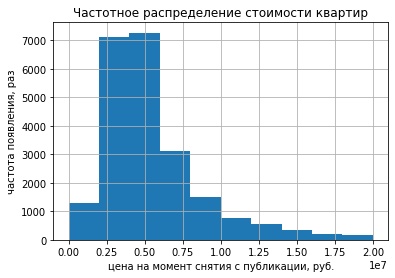

In [23]:
df['last_price'].hist(bins=10, range=(0, 20000000))
plt.xlabel('цена на момент снятия с публикации, руб.')
plt.ylabel('частота появления, раз')
plt.title("Частотное распределение стоимости квартир")
plt.show()
#видим, что основная часть данных last_price лежит в диапазоне примерно до 12 млн.руб.

(-1000000, 13000000)

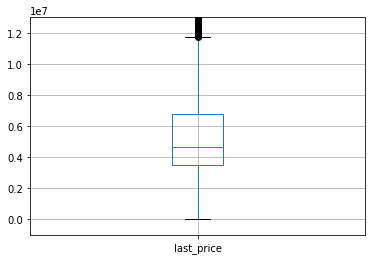

In [24]:
#построим диаграмму размаха для более глубокого анализа
df.boxplot(column='last_price')
plt.ylim(-1000000, 13000000)
#Таким образом, наши выводы подтвердились, мы можем удалить все строки, 
#где в столбце last_price значения выше 12 млн.руб.

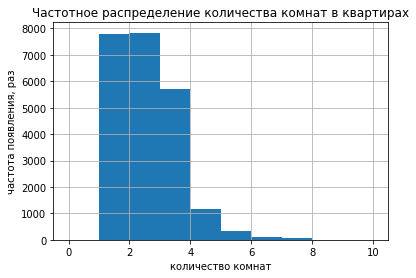

In [25]:
df['rooms'].hist(bins=10, range=(0, 10))
plt.xlabel('количество комнат')
plt.ylabel('частота появления, раз')
plt.title("Частотное распределение количества комнат в квартирах")
plt.show()
#ожидаемо, что основная часть данных rooms лежит в диапазоне от 1 до 5 комнат.

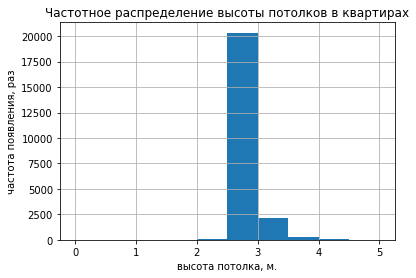

In [26]:
df['ceiling_height'].hist(bins=10, range=(0, 5))
plt.xlabel('высота потолка, м.')
plt.ylabel('частота появления, раз')
plt.title("Частотное распределение высоты потолков в квартирах")
plt.show()
#ожидаемо, основная часть данных ceiling_height лежит в диапазоне от 2,5 до 3,5 метров -
# это и будет наш допустимый диапазон значений

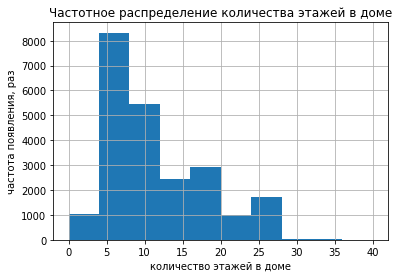

In [27]:
df['floors_total'].hist(bins=10, range=(0, 40))
plt.xlabel('количество этажей в доме')
plt.ylabel('частота появления, раз')
plt.title("Частотное распределение количества этажей в доме")
plt.show()
#оставим строки, в которых общая этажность укладывается в 28 этажей

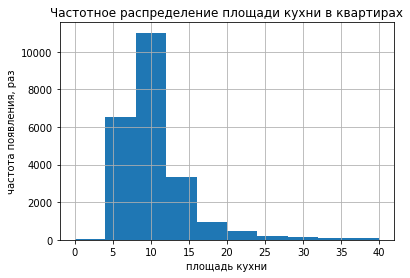

In [28]:
df['kitchen_area'].hist(bins=10, range=(0, 40))
plt.xlabel('площадь кухни')
plt.ylabel('частота появления, раз')
plt.title("Частотное распределение площади кухни в квартирах")
plt.show()
#оставим строки, в которых площадь кухни укладывается в 16 кв.м

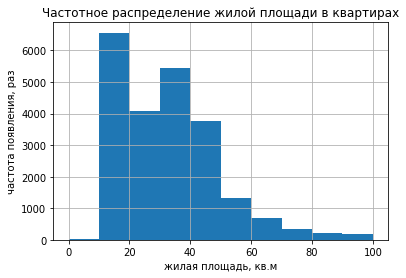

In [29]:
df['living_area'].hist(bins=10, range=(0, 100))
plt.xlabel('жилая площадь, кв.м')
plt.ylabel('частота появления, раз')
plt.title("Частотное распределение жилой площади в квартирах")
plt.show()
#оставим строки, в которых жилая площадь укладывается в 70 кв.м

182.26344

97.0

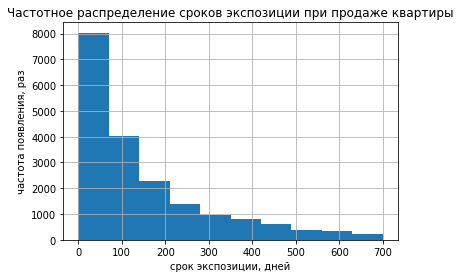

In [30]:
#исследуем срок экспозиции
df['days_exposition'].hist(bins=10, range=(0, 700))
plt.xlabel('срок экспозиции, дней')
plt.ylabel('частота появления, раз')
plt.title("Частотное распределение сроков экспозиции при продаже квартиры")
display(df['days_exposition'].mean())
display(df['days_exposition'].median())
#мы видим почти двукратное превышение среднего над медианой, что указывает на присутствие аномально долгого времени продажи.
#обычно продажа длится порядка 3 месяцев (95 дней) - значение медианы.

(-50, 550)

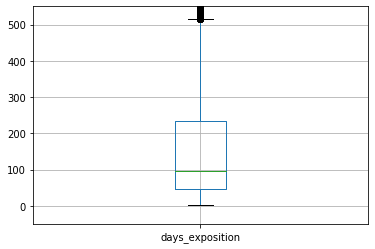

In [31]:
#построим диаграмму размаха для сроков экспозиции
df.boxplot(column='days_exposition')
plt.ylim(-50, 550)
# Первый и третий квартили служат нам ориентиром для быстрых и долгих продаж: продажу можно считать быстрой, 
#если она заняла менее 50 дней и продажа становится долгой, если срок экспозиции превышает 225 дней

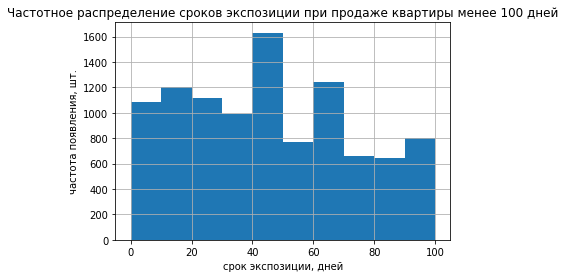

In [32]:
#проверим наши предположения, построив гистограмму для объявлений со сроком менее 100 дней
#мы видим пик для периода 40-50 дней, т.е. продажи меньше чем за 40 дней можно считать очень быстрыми. 
df['days_exposition'].hist(bins=10, range=(0, 100))
plt.xlabel('срок экспозиции, дней')
plt.ylabel('частота появления, шт.')
plt.title("Частотное распределение сроков экспозиции при продаже квартиры менее 100 дней")
plt.show()

In [33]:
#уберем обнаруженные выбросы для каждого из проанализированных столбцов
df = df.query('total_area >= 15 and total_area <= 115 \
               and last_price <= 12000000 \
               and rooms >= 1 and rooms <= 5 \
               and ceiling_height >= 2.5 and ceiling_height <= 3.5 \
               and kitchen_area <= 16 \
               and living_area <= 70 \
               and floors_total <= 28')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19715 entries, 1 to 23698
Data columns (total 23 columns):
last_price                19715 non-null uint32
total_area                19715 non-null float32
first_day_exposition      19715 non-null datetime64[ns]
rooms                     19715 non-null uint8
ceiling_height            19715 non-null float32
floors_total              19715 non-null uint8
living_area               19715 non-null float32
floor                     19715 non-null uint8
kitchen_area              19715 non-null float32
balcony                   19715 non-null uint8
locality_name             19715 non-null category
cityCenters_nearest       14690 non-null float32
days_exposition           17317 non-null float32
area_check                19715 non-null category
price_per_meter           19715 non-null float64
weekday                   19715 non-null int64
month_exposition          19715 non-null int64
year_exposition           19715 non-null int64
living_to_total

После удаления всех выбросов и строк с пропусками в столбцах locality_name и floors_total у нас остался массив в 20 013 строки
что составляет 84% от первоначального размера данных.
остались строки с пропущенными значениями в столбцах cityCenters_nearest и days_exposition.

In [34]:
#определим, есть ли зависимость между ценой за кв.м и количеством комнат: выведем средние значения, а также определим коэффициент корреляции
display(df.pivot_table(index='rooms', values='price_per_meter', aggfunc= 'mean'))
display(df['price_per_meter'].corr(df['rooms']))
#несмотря на кажущуюся взаимосвязь между ценой и количеством комнат, коэффициент корреляции верно показывает обратную зависимость,
# но степень влияния незначительна

,price_per_meter
rooms,
1,"99,125.15"
2,"89,366.78"
3,"82,999.29"
4,"80,364.93"
5,"75,809.46"


-0.22322852632725657

,count,min,max,std,mean
,price_per_meter,price_per_meter,price_per_meter,price_per_meter,price_per_meter
rooms,,,,,
1,7468,"11,000.00","387,096.77","29,094.73","99,125.15"
2,7089,"7,962.96","227,571.11","30,314.21","89,366.78"
3,4531,"10,897.44","215,439.85","25,287.62","82,999.29"
4,588,"13,483.15","149,664.43","21,166.98","80,364.93"
5,39,"22,458.63","117,848.97","22,230.15","75,809.46"


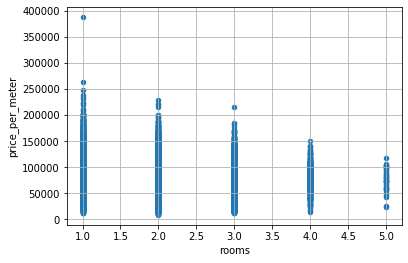

In [35]:
#рассмотрим данные в этом срезе более внимательно
display(df.pivot_table(index='rooms', values='price_per_meter', aggfunc= ['count', 'min', 'max', 'std', 'mean']))
df.plot(x='rooms', y='price_per_meter', kind='scatter', grid=True)
plt.show()

Мы видим, что разброс цен внутри одной группы отличается в десятки раз, 
это подверждается стандартным отклонением, которое составляет порядка 30% от среднего
за счет этого происходит перекрытие диапазонов цен, что видно диаграмме рассеивания
этим и объясняется столь низкий коэффициент корреляции, поскольку в выборку попали квартиры с самыми разными характеристиками.

In [36]:
#выведем матрицу корреляции для всего массива
df.corr()

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,cityCenters_nearest,days_exposition,price_per_meter,weekday,month_exposition,year_exposition,living_to_total_area,kitchen_to_total_area,cityCenters_nearest_km,floor_group_number
last_price,1.00,0.68,0.42,0.35,0.24,0.54,0.16,0.45,0.08,-0.34,0.05,0.66,-0.01,0.00,0.02,0.04,-0.24,-0.34,0.03
total_area,0.68,1.00,0.81,0.25,-0.01,0.91,-0.02,0.39,0.07,-0.11,0.09,-0.07,-0.01,0.01,-0.05,0.32,-0.58,-0.11,0.00
rooms,0.42,0.81,1.00,0.07,-0.23,0.91,-0.17,-0.02,0.02,-0.07,0.07,-0.22,0.00,0.00,-0.03,0.67,-0.76,-0.07,-0.02
ceiling_height,0.35,0.25,0.07,1.00,0.02,0.18,0.01,0.29,-0.03,-0.23,0.05,0.21,-0.01,-0.00,-0.04,-0.08,0.03,-0.23,0.01
floors_total,0.24,-0.01,-0.23,0.02,1.00,-0.18,0.67,0.43,0.16,-0.05,-0.04,0.36,0.01,0.01,-0.00,-0.43,0.39,-0.05,0.00
living_area,0.54,0.91,0.91,0.18,-0.18,1.00,-0.14,0.12,0.03,-0.10,0.08,-0.17,-0.00,0.00,-0.04,0.66,-0.73,-0.10,-0.00
floor,0.16,-0.02,-0.17,0.01,0.67,-0.14,1.00,0.28,0.16,-0.02,-0.04,0.26,0.01,0.02,0.00,-0.30,0.28,-0.02,0.33
kitchen_area,0.45,0.39,-0.02,0.29,0.43,0.12,0.28,1.00,0.12,-0.10,0.04,0.23,-0.01,0.02,-0.03,-0.46,0.48,-0.10,0.01
balcony,0.08,0.07,0.02,-0.03,0.16,0.03,0.16,0.12,1.00,0.05,-0.02,0.04,-0.00,0.00,0.00,-0.07,0.03,0.05,0.08
cityCenters_nearest,-0.34,-0.11,-0.07,-0.23,-0.05,-0.10,-0.02,-0.10,0.05,1.00,-0.01,-0.40,0.01,-0.01,0.01,-0.01,0.01,1.00,-0.01


Практически для всех факторов коэффициенты показывают слабый уровень корреляции (менее abs(0,3) зависимости цены за кв.м от выбранных факторов
исключение составляют показатель "общая стоимость - 0,65" и рассотяние до центра (-0,4)

**Слабая корреляция объясняется тем, что цена за кв.м зависит сразу от множества факторов: локации, тип дома, год постройки дома, ремонт, транспортная доступность, площади и десятков других. Этим и объясняется столь широкий разброс цен внутри каждого уровня нашей группирующей переменной (мы взяли число комнат). Однако если выборку сделать более однородной, скажем, выгрузить данные по одному району города, для домов одного периода постройки с обычным ремонтом, то корреляция может быть сильнее, поскольку при отсутствии влияния иных факторов стоимость квадратного метра обратно пропорциональна количеству комнат.**

In [37]:
#Выберем 10 населённых пунктов с наибольшим числом объявлений
display(df['locality_name'].value_counts().head(10))
#создадим из них список 
top_10_locality_name = ["Санкт-Петербург", "Мурино", "поселок Шушары", "Кудрово", "Всеволожск", "Колпино", "Пушкин", "поселок Парголово", "Гатчина", "Выборг"]

Санкт-Петербург      12465
Мурино                 505
поселок Шушары         416
Кудрово                383
Всеволожск             362
Колпино                318
Пушкин                 312
поселок Парголово      302
Гатчина                292
Выборг                 210
Name: locality_name, dtype: int64

In [38]:
#теперь созададим срез, который будет содержать строки только из нашего списка топ-10
df_locality_name = df.query('locality_name in @top_10_locality_name')
#а затем посчитаем среднюю цену для каждого населенного пункта
df_locality_name.pivot_table(index='locality_name', values='price_per_meter', aggfunc= 'mean').sort_values(by='price_per_meter',ascending = False)
#самая высокая цена за кв.м в нашем списке в Санкт-Петербурге, а самая низкая - в Выборге.

,price_per_meter
locality_name,
Санкт-Петербург,"105,091.32"
Пушкин,"99,974.89"
Кудрово,"94,982.73"
поселок Парголово,"91,040.63"
Мурино,"85,268.80"
поселок Шушары,"78,022.40"
Колпино,"75,076.09"
Гатчина,"68,551.96"
Всеволожск,"66,916.52"


In [39]:
#найти среднюю цену для 10 населённых пунктов с наибольшим числом объявлений можно и с помощью сводной таблицы
df.pivot_table(index='locality_name', values='price_per_meter', aggfunc= ['count', 'mean']).sort_values(by=('count', 'price_per_meter'), ascending=False).head(10)

,count,mean
,price_per_meter,price_per_meter
locality_name,,
Санкт-Петербург,12465,"105,091.32"
Мурино,505,"85,268.80"
поселок Шушары,416,"78,022.40"
Кудрово,383,"94,982.73"
Всеволожск,362,"66,916.52"
Колпино,318,"75,076.09"
Пушкин,312,"99,974.89"
поселок Парголово,302,"91,040.63"


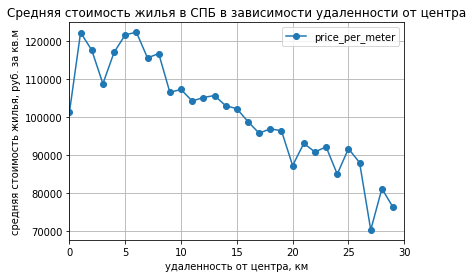

In [40]:
#Определим, какая область является центром Санкт-Петербурга по стоимость квадратного метра жилья.
df_spb = df.query('locality_name == "Санкт-Петербург"')
df_spb = df_spb.dropna(subset=["cityCenters_nearest"])
#посчитаем среднюю цену для каждого километра и построим график как цена зависит от удалённости от центра.
ax = df_spb.pivot_table(index='cityCenters_nearest_km', values='price_per_meter', aggfunc= 'mean').plot(xlim=(0, 30), grid=True, style="o-")
ax.set_title("Средняя стоимость жилья в СПБ в зависимости удаленности от центра")
ax.set_xlabel("удаленность от центра, км")
ax.set_ylabel("средняя стоимость жилья, руб. за кв.м")
plt.show()
#по графику видим, что центральная зона ограничивается примерно 10 км., далее цена начинает сильно снижаться.

In [41]:
#теперь проанализируем сегмент квартир в центре города (cityCenters_nearest_km <= 10 км)
df_spb_cityCenter = df.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km <=10')
#сравним влияние факторов на стоимость жилья как для города в целом, так и только для центра
df_spb_cityCenter.corr()

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,cityCenters_nearest,days_exposition,price_per_meter,weekday,month_exposition,year_exposition,living_to_total_area,kitchen_to_total_area,cityCenters_nearest_km,floor_group_number
last_price,1.00,0.76,0.49,0.33,0.05,0.62,0.08,0.49,0.04,-0.36,0.13,0.40,0.02,0.01,0.01,0.04,-0.31,-0.36,0.07
total_area,0.76,1.00,0.81,0.35,-0.11,0.91,-0.06,0.41,-0.06,-0.32,0.12,-0.27,-0.01,0.02,-0.07,0.28,-0.59,-0.32,0.05
rooms,0.49,0.81,1.00,0.26,-0.29,0.89,-0.18,0.07,-0.14,-0.25,0.08,-0.40,-0.02,0.02,-0.05,0.59,-0.71,-0.24,0.05
ceiling_height,0.33,0.35,0.26,1.00,-0.22,0.33,-0.16,0.24,-0.12,-0.36,0.09,0.04,-0.02,0.01,0.02,0.09,-0.12,-0.35,0.00
floors_total,0.05,-0.11,-0.29,-0.22,1.00,-0.25,0.67,0.31,0.34,0.37,-0.03,0.24,0.00,-0.02,0.01,-0.42,0.39,0.36,-0.03
living_area,0.62,0.91,0.89,0.33,-0.25,1.00,-0.16,0.17,-0.12,-0.28,0.10,-0.35,-0.02,0.02,-0.06,0.63,-0.71,-0.28,0.06
floor,0.08,-0.06,-0.18,-0.16,0.67,-0.16,1.00,0.21,0.28,0.26,-0.04,0.20,0.02,-0.01,0.03,-0.27,0.25,0.25,0.33
kitchen_area,0.49,0.41,0.07,0.24,0.31,0.17,0.21,1.00,0.10,-0.20,0.13,0.17,0.01,0.02,-0.08,-0.41,0.45,-0.21,0.00
balcony,0.04,-0.06,-0.14,-0.12,0.34,-0.12,0.28,0.10,1.00,0.19,-0.04,0.13,0.01,0.00,-0.02,-0.17,0.14,0.18,0.06
cityCenters_nearest,-0.36,-0.32,-0.25,-0.36,0.37,-0.28,0.26,-0.20,0.19,1.00,-0.09,-0.14,0.00,-0.05,0.08,-0.06,0.12,0.99,-0.00


Как мы видим, по сравнению с данными по городу в целом коэффициенты корреляции для выборки по квартирам в центре города стали более чувствительны к таким факторам как количество комнат (-0.4 vs - 0.23). 
Зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом, по-прежнему стремится к нулю. Вляиние удаленности от центра наоборот снизилась (-0.14 vs -0.4), что объясняется однородностью выборки с точки зрения локации.
Дата размещения объявления (день недели, месяц и год) по-прежнему никак не влияют на стоимость. Стоит отметить чуть большее влияние года (0,12) по сравнению с днем недели и месяцем (около 0).
В данном случае мы можем говорить, что в рассмотренный период (2014-2019) не было сильного роста цен на недвижимость, как это произошло в 2020-2021 гг.

Выпишем факторы, имеющие положительную и отрицательную корреляцию для цены за кв.м (для значений выше abs(0.1)
Факторы с положительной корреляцией (чем больше показатель, тем выше цена за кв.м):
 - общая цена продажи
 - количество этажей в доме
 - этаж (без привязки к типу "первый", "последний" и "другой")
 - площадь кухни
 - наличие балкона
 - год публикации объявления (обычно недвижимость растет на уровень инфляции)

Факторы с отрицательной корреляцией (чем меньше показатель, тем выше цена за кв.м):
 - общая площадь квартиры
 - количество комнат
 - жилая площадь
 - расстояние до центра


## Общий вывод

<!-- # столь низкий коэффициент корреляции объясняется тем, что цена за кв.м зависит от множества факторов: 
# локации, тип дома, год постройки дома, ремонт, траснпортная доступность, площади и десятков других факторов - этим и объяснятеся столь широкий разброс цен
# поэтому если смотреть только зависимость между ценой и количеством комнат, степень корреляции столь низкая
# однако если выборку сделать более однородной, скажем, выгрузить данные по одному району города, для домов одного периода постройки с обычным ремонтом,
# то уровень корреляции окажется выше, поскольку квартиры меньшей площадью при отсутсвии иных факторов, стоят дороже квартир большей площади. -->

На основании проведенного анализа можно сделать следующие выводы:
    1) Как известно, стоимость недвижимости определяется тремя факторами «location, location, location». 
    Это в очередной раз продемонстировали резульаты нашего анализа - значения коэффициентов корреляции сильно зависят от однородности выборки.  Цена за кв.м зависит сразу от множества факторов: локации, тип дома, год постройки дома, ремонт, транспортная доступность, площади и десятков других. Этим и объясняется столь широкий разброс цен внутри каждого уровня нашей группирующей переменной (мы взяли число комнат). Но после того как мы сделали выборку более однородной (оставили квартиры в центре города), коэффициенты корреляции обозначились острее.

    2) Мы выделили следующие факторы, которые в совокупности в той или иной мере влияют на стоимость квадратного метра:
        
Факторы с положительной корреляцией:
 - общая цена продажи;
 - количество этажей в доме;
 - этаж (без привязки к типу "первый", "последний" и "другой");
 - площадь кухни;
 - наличие балкона;
 - год публикации объявления.

Факторы с отрицательной корреляцией:
 - общая площадь квартиры;
 - количество комнат;
 - жилая площадь;
 - расстояние до центра.
 
 3) Дата размещения объявления (день недели и месяц) никак не влияют на стоимость. Стоит отметить чуть большее влияние года (0,12) по сравнению с днем недели и месяцем (около 0). В данном случае мы можем говорить, что в рассмотренный период (2014-2019) не было сильного роста цен на недвижимость, как это произошло в 2020-2021 гг.

- [x]  открыт файл
- [ ]  файлы изучены (выведены первые строки, метод info())
- [ ]  определены пропущенные значения
- [ ]  заполнены пропущенные значения
- [ ]  есть пояснение, какие пропущенные значения обнаружены
- [ ]  изменены типы данных
- [ ]  есть пояснение, в каких столбцах изменены типы и почему
- [ ]  посчитано и добавлено в таблицу: цена квадратного метра
- [ ]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [ ]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [ ]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [ ]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [ ]  построены гистограммы для каждого параметра
- [ ]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [ ]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [ ]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [ ]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [ ]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [ ]  в каждом этапе есть выводы
- [ ]  есть общий вывод

[В начало](#section_id)